<a href="https://colab.research.google.com/github/Machocho254/MchezoPesa-Week-6-IP/blob/master/Moringa_DS_CORE_WEEK6_IP_01_2020_Machocho_Mengo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FIFA DATA ANALYSIS**

## **DEFINITION OF THE QUESTION**


We have been tasked with  finding  prediction results of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly.

Model 1:  Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

## **METRIC FOR SUCCESS**



1.   Exhaustively perfom data cleaning and EDA
2.   Use of regression models to predict the home and away team goals
3.   Give a justification for the models used. 



## **CONTEXT**

The client will use the model for predictions to set up betting odds for future games. 

# **PREVIEWING THE DATA**

The data for the purposes of this research can be found here: https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc 

Both the dataset and glossary have been uploaded



### **READING THE DATA**

In [0]:
# Importing the data
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical Processing on arrays and matrices
import matplotlib.pyplot as plt #Generating visualizations
import seaborn as sns #Visualizations based on matplot lib
import pandas_profiling as pp
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
from scipy import stats


In [0]:
# loading the dataset

fifa_df = pd.read_csv('/content/fifa_ranking.csv')

results_df = pd.read_csv('/content/results.csv')


### **CHECKING DATA**

In [90]:
# previewing the first observations for dataset for fifa

fifa_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [91]:
# previewing the last records

fifa_df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [92]:
# more preview opttions for the data

pd.set_option('display.max_rows', 100)
fifa_df

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [93]:
# to find number of rows and columns

fifa_df.shape

(57793, 16)

In [94]:
# to check whether columns have the coorrect datatypes

fifa_df.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [95]:
# previewing thee result dataset

results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [96]:
# previewing the last observations 

results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [97]:

# more previewing options 

pd.set_option('display.max_rows', 100)
results_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [98]:
# getting number of rows and columns

results_df.shape

(40839, 9)

### **Changing the date to datetime from object**

In [0]:
results_df['date'] = pd.to_datetime(results_df['date'])

In [0]:
fifa_df['rank_date'] = pd.to_datetime(fifa_df['rank_date'])

The FIFA rankings commenced in 1992. We drop the observations from before 1993. 

After deleeting

In [68]:
df1 = results_df[results_df['date'] == '1993-01-01']
df

# to delete the records 

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True


In [70]:
results = results_df[results_df["date"] > '1993-01-01']
results.shape

(23477, 9)

In [73]:
results[['year','month','day']] = results['date'].astype(str).str.split('-', expand=True).astype(int)
results.take(np.random.permutation(len(results))[:10])

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
24881,2002-07-28,Saint Kitts and Nevis,Trinidad and Tobago,2,1,SKN Football Festival,Basseterre,Saint Kitts and Nevis,False,2002,7,28
26954,2004-10-09,Croatia,Bulgaria,2,2,FIFA World Cup qualification,Zagreb,Croatia,False,2004,10,9
37111,2015-07-11,Jamaica,Canada,1,0,Gold Cup,Houston,United States,True,2015,7,11
32706,2011-01-09,Japan,Jordan,1,1,AFC Asian Cup,Doha,Qatar,True,2011,1,9
27063,2004-11-13,Saint Kitts and Nevis,Mexico,0,5,FIFA World Cup qualification,Miami,United States,True,2004,11,13
30033,2008-03-26,France,England,1,0,Friendly,Saint-Denis,France,False,2008,3,26
30172,2008-05-31,Botswana,Madagascar,0,0,FIFA World Cup qualification,Gaborone,Botswana,False,2008,5,31
25275,2003-02-12,England,Australia,1,3,Friendly,London,England,False,2003,2,12
19037,1995-07-22,Colombia,United States,4,1,Copa América,Maldonado,Uruguay,True,1995,7,22
28992,2007-03-06,Chad,Central African Republic,3,2,Friendly,N'Djamena,Chad,False,2007,3,6


In [75]:
fifa_df[['year','month','day']] = fifa_df['rank_date'].astype(str).str.split('-', expand=True).astype(int)
fifa_df.take(np.random.permutation(len(fifa_df))[:10])

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,day
19572,1,Brazil,BRA,0.00,856,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,2003-01-15,2003,1,15
20276,91,FYR Macedonia,MKD,0.00,464,-4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,2003-04-23,2003,4,23
56148,44,Burkina Faso,BFA,704.69,639,11,418.08,418.08,408.27,204.13,112.33,33.70,243.93,48.79,CAF,2017-11-23,2017,11,23
34899,109,Georgia,GEO,0.00,314,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,2009-04-08,2009,4,8
49166,198,Brunei Darussalam,BRU,15.48,15,0,0.00,0.00,0.00,0.00,51.60,15.48,0.00,0.00,AFC,2015-01-08,2015,1,8
36031,203,American Samoa,ASA,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,OFC,2009-09-02,2009,9,2
6680,97,Kenya,KEN,0.00,25,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1997-05-14,1997,5,14
37214,147,Malaysia,MAS,0.00,124,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,AFC,2010-03-31,2010,3,31
49853,49,Congo,CGO,623.76,624,0,420.24,420.24,127.42,63.71,301.43,90.43,246.89,49.38,CAF,2015-05-07,2015,5,7
17122,190,Equatorial Guinea,EQG,0.00,82,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,2001-11-21,2001,11,21


In [82]:
rankings = fifa_df[['rank', 'country_full', 'rank_date', 'year']]
rankings

,rank,country_full,rank_date,year
0,1,Germany,1993-08-08,1993
1,2,Italy,1993-08-08,1993
2,3,Switzerland,1993-08-08,1993
3,4,Sweden,1993-08-08,1993
4,5,Argentina,1993-08-08,1993
...,...,...,...,...
57788,206,Anguilla,2018-06-07,2018
57789,206,Bahamas,2018-06-07,2018
57790,206,Eritrea,2018-06-07,2018
57791,206,Somalia,2018-06-07,2018


In [84]:
matches = results[['year', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'country']]
matches

,year,home_team,away_team,home_score,away_score,tournament,country
17362,1993,Gabon,Burkina Faso,1,1,Friendly,Gabon
17363,1993,Kuwait,Lebanon,2,0,Friendly,Kuwait
17364,1993,Burkina Faso,Mali,1,0,Friendly,Gabon
17365,1993,Gabon,Ghana,2,3,Friendly,Gabon
17366,1993,Uganda,Tanzania,3,1,Friendly,Uganda
...,...,...,...,...,...,...,...
40834,2019,American Samoa,Tahiti,8,1,Pacific Games,Samoa
40835,2019,Fiji,Solomon Islands,4,4,Pacific Games,Samoa
40836,2019,Senegal,Algeria,0,1,African Cup of Nations,Egypt
40837,2019,Tajikistan,North Korea,0,1,Intercontinental Cup,India


In [101]:
dataset = matches.merge(rankings, left_on = ['date', 'country'],
                        right_on = ['rank_date', 'country_full'], how = 'inner')

KeyError: ignored

In [49]:
# checking for data types

results_df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

### **EXTERNAL DATA SOURCE VALIDATION**

The datsets are valid in relation to the company Mchezo. They have entries in columns needed to wok on the question. 

The variables needed are:


1.   Rank
2.   Name of country
3.   Scores
4.   Tournament type 



# **DATA CLEANING**

### **Checking for outliers and dealing with them**

In [50]:
# checking for outliers using the Z score

z = np.abs(stats.zscore(fifa_df['rank']))
print(z)

[1.71667796 1.69961833 1.6825587  ... 1.78054627 1.78054627 1.78054627]


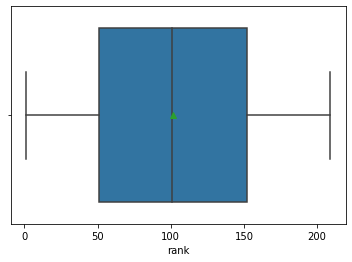

In [51]:
# outliers for rank variable in 
sns.boxplot(x = fifa_df['rank'], showmeans= True)


The ranks variable has no outliers. 

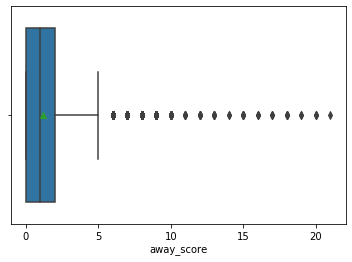

In [52]:
# ouliers for away team

sns.boxplot(x = results_df['away_score'], showmeans=True)

In [53]:
# checking for outliers using the zscore

z = np.abs(stats.zscore(results_df['away_score']))
print(z)

[0.84556424 0.57781937 0.13387244 ... 0.13387244 0.13387244 0.13387244]


In [54]:
# set a threshhold

threshold = 3
print(np.where(z > 3))

(array([   17,    19,    31,    39,    40,    43,    44,    59,    69,
          87,   104,   122,   144,   205,   215,   217,   218,   241,
         242,   271,   306,   324,   327,   328,   367,   451,   547,
         592,   694,   728,   778,   818,   904,   920,   975,   981,
        1002,  1004,  1009,  1036,  1042,  1085,  1127,  1143,  1172,
        1200,  1265,  1294,  1361,  1389,  1432,  1441,  1536,  1635,
        1640,  1644,  1658,  1666,  1721,  1761,  1787,  1841,  1881,
        1883,  1964,  1969,  1993,  2045,  2074,  2098,  2121,  2126,
        2162,  2178,  2243,  2261,  2324,  2358,  2406,  2410,  2439,
        2495,  2518,  2536,  2579,  2610,  2614,  2629,  2647,  2670,
        2672,  2689,  2692,  2694,  2719,  2752,  2764,  2798,  2849,
        2852,  2857,  2860,  2871,  2896,  2942,  2957,  2959,  3012,
        3017,  3117,  3243,  3255,  3256,  3273,  3285,  3296,  3306,
        3339,  3349,  3350,  3359,  3363,  3404,  3442,  3481,  3500,
        3517,  3523

In [65]:
results_df.iloc[39:40]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
39,1885-03-23,Wales,Scotland,1,8,British Championship,Wrexham,Wales,False


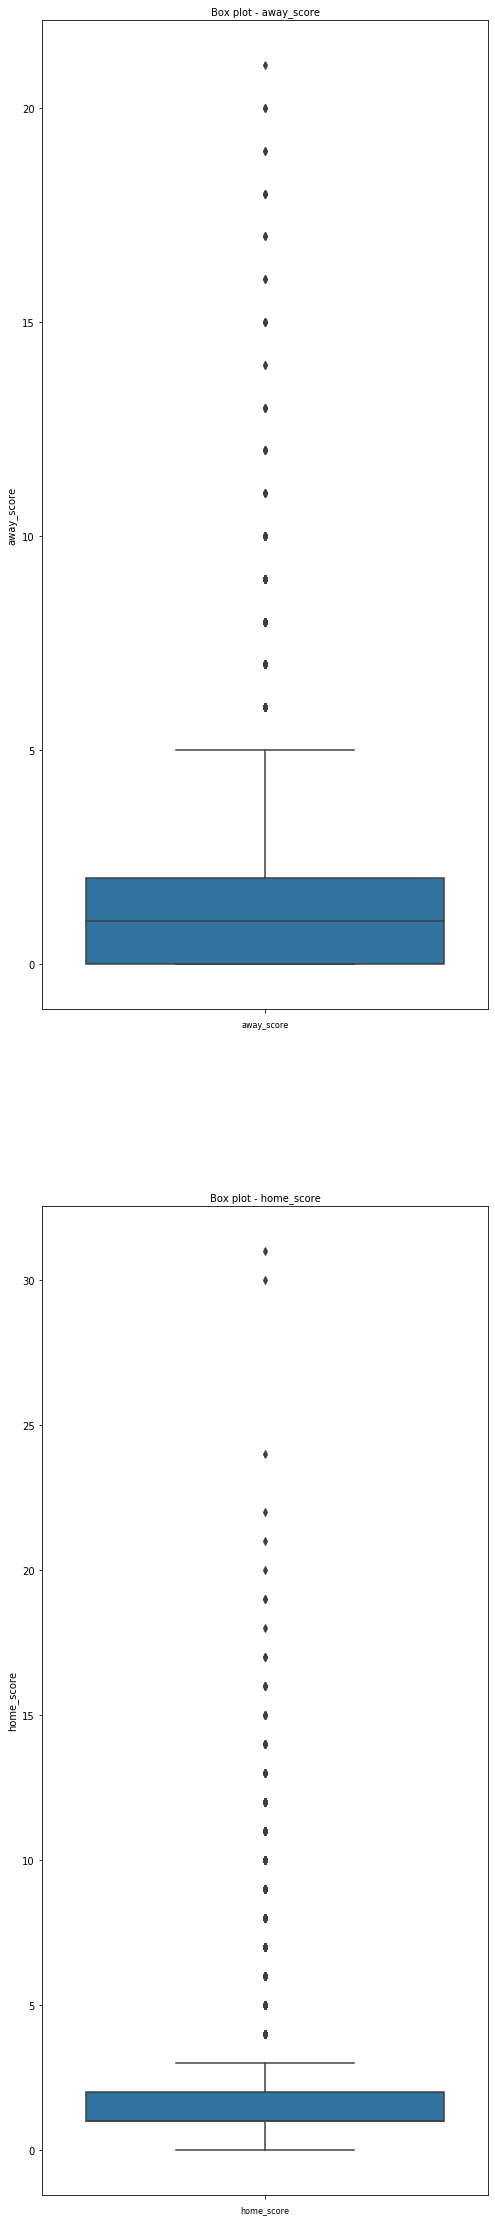

In [55]:
# findining outliers in results
columns=['away_score','home_score']
fig, ax = plt.subplots(len(columns), figsize=(8,40))
for i, values in enumerate(columns):

    sns.boxplot(y=results_df[values], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(values), fontsize=10)
    ax[i].set_xlabel(values, fontsize=8)
plt.show()

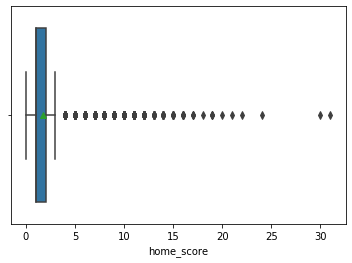

In [25]:
# outliers for home score 

sns.boxplot(x = results_df['home_score'], showmeans=True)

The data boxplots show that the variables have outliers. Upon checking the data again, it has been noted that we do not need to drop or correct them as they are goals that were actually won.  

### **Checking for anomalies**

# **EXPLORATORY DATA ANALYSIS**

# **REGRESSION ANALYSIS**